In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("C:\\Users\\sarit\\Downloads\\Algorithms_projects\\Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

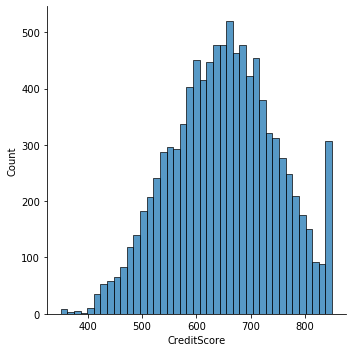

In [9]:
sns.displot(df.CreditScore)

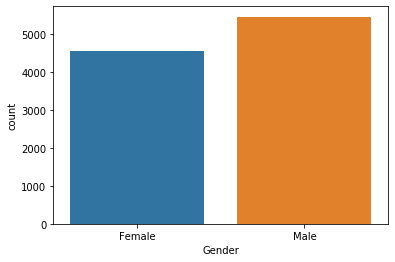

In [10]:
sns.countplot(x=df.Gender)

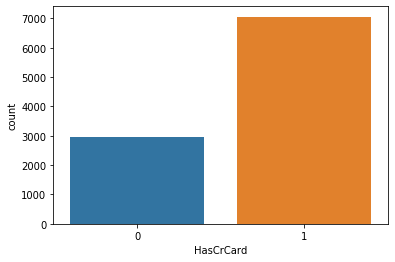

In [11]:
sns.countplot(x=df.HasCrCard )

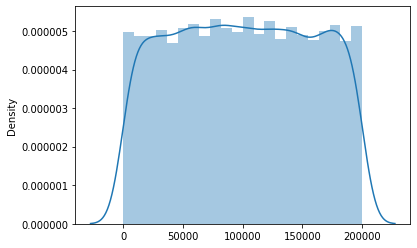

In [12]:
sns.distplot(x=df.EstimatedSalary)

In [13]:
#Get dummy values for Gender column
Gender=pd.get_dummies(df['Gender'], drop_first=True)
df=pd.concat([df,Gender], axis=1)

#Delete other columns
df.drop(['RowNumber','Surname', 'Gender','Geography'], axis=1, inplace=True)

In [14]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0


In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
# Scale values of all varibales to same scale
# This helps in increasing performance of algorithm
scaler = StandardScaler()

In [18]:
scaler.fit(df.drop(columns=['Exited']))

StandardScaler()

In [19]:
#Use scaled values to create new values
scaled_features = scaler.transform(df.drop(columns=['Exited'],axis=1))

In [20]:
scaled_features[0]

array([-0.78321342, -0.32622142,  0.29351742, -1.04175968, -1.22584767,
       -0.91158349,  0.64609167,  0.97024255,  0.02188649, -1.09598752])

In [21]:
x=df.drop(["Exited"],axis=1)
y=df.Exited

In [22]:
x.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Male'],
      dtype='object')

In [23]:
#create DF using scaled values
df_feat = pd.DataFrame(scaled_features,columns=x.columns)
# df_feat_updated = df_feat.rename({'Exited':'Male'},axis='columns')
df_feat.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988


## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30,random_state=101)

In [26]:
#import algorithm"
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Start with random value of K
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
pred = knn.predict(X_test)

In [30]:
pd.Series(pred).value_counts()

0    2613
1     387
dtype: int64

In [32]:
y_test.value_counts()

0    2378
1     622
Name: Exited, dtype: int64

In [33]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

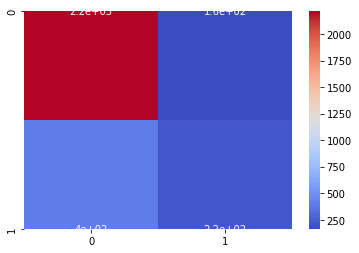

In [34]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)

In [35]:
confusion_matrix(y_test,pred)

array([[2214,  164],
       [ 399,  223]], dtype=int64)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2378
           1       0.58      0.36      0.44       622

    accuracy                           0.81      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.79      0.81      0.79      3000



In [37]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

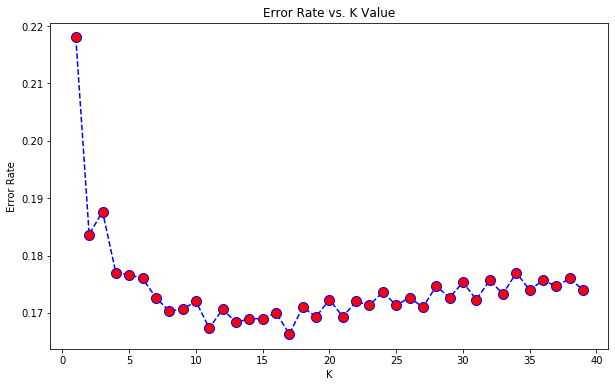

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=1




              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2378
           1       0.47      0.45      0.46       622

    accuracy                           0.78      3000
   macro avg       0.67      0.66      0.66      3000
weighted avg       0.78      0.78      0.78      3000



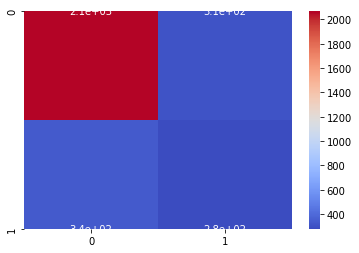

In [39]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)
print('\n')
print(classification_report(y_test,pred))

WITH K=7




              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2378
           1       0.70      0.29      0.41       622

    accuracy                           0.83      3000
   macro avg       0.77      0.63      0.66      3000
weighted avg       0.81      0.83      0.80      3000



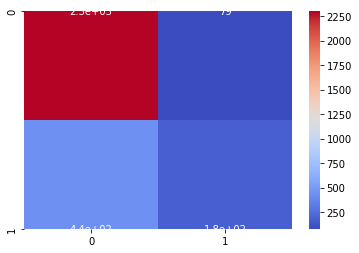

In [40]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)
print('\n')
print(classification_report(y_test,pred))

In [41]:
accuracy_score(y_test, pred)

0.8273333333333334

WITH K25




              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2378
           1       0.83      0.22      0.35       622

    accuracy                           0.83      3000
   macro avg       0.83      0.60      0.62      3000
weighted avg       0.83      0.83      0.79      3000



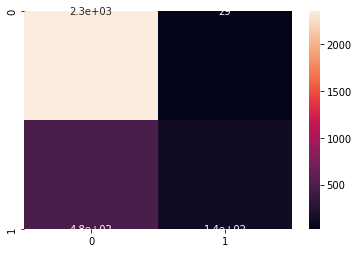

In [42]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K25')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
print('\n')
print(classification_report(y_test,pred))

In [43]:

y_test.value_counts()

0    2378
1     622
Name: Exited, dtype: int64

In [44]:
confusion_matrix(y_pred=pred,y_true=y_test)

array([[2349,   29],
       [ 485,  137]], dtype=int64)

In [45]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [46]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\common files\new folder\lib\site-packages (0.11.0)


In [47]:
pip show imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


'C:\Common' is not recognized as an internal or external command,
operable program or batch file.


In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
os=RandomOverSampler()

In [50]:
X_train,y_train=os.fit_resample(X_train,y_train)

In [51]:
y_train.value_counts()

0    5585
1    5585
Name: Exited, dtype: int64

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [53]:
pred1=knn.predict(X_test)

In [54]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1980
           1       0.72      0.44      0.54      1020

    accuracy                           0.75      3000
   macro avg       0.74      0.67      0.69      3000
weighted avg       0.74      0.75      0.73      3000



WITH K25




              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2378
           1       0.42      0.62      0.50       622

    accuracy                           0.75      3000
   macro avg       0.65      0.70      0.67      3000
weighted avg       0.79      0.75      0.76      3000



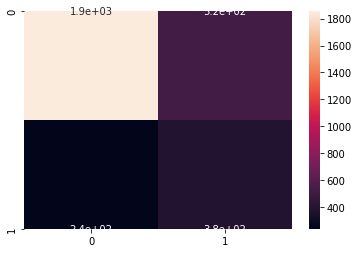

In [55]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K25')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
print('\n')
print(classification_report(y_test,pred))

In [56]:
from imblearn.under_sampling import RandomUnderSampler

In [57]:
us=RandomUnderSampler()

In [58]:
X,Y=us.fit_resample(scaled_features,df['Exited'])

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
pred2=knn.predict(x_test)

In [62]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       497
           1       0.59      0.79      0.67       318

    accuracy                           0.70       815
   macro avg       0.71      0.72      0.70       815
weighted avg       0.73      0.70      0.71       815



WITH K15




              precision    recall  f1-score   support

           0       0.63      0.83      0.71       389
           1       0.78      0.55      0.65       426

    accuracy                           0.68       815
   macro avg       0.70      0.69      0.68       815
weighted avg       0.71      0.68      0.68       815



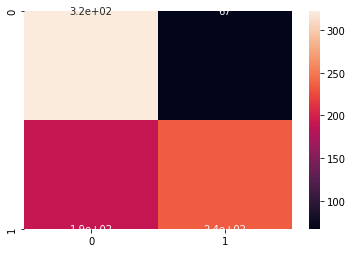

In [63]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K15')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
print('\n')
print(classification_report(y_test,pred))